### Aanalysis: ###

#### Scatter plot shows that each news media sent more positive tweets than the negative. ###

#### The bar plot shows, out of the given media sources CBS has maximum positive polarity. The polarity of BBC and Fox have is very close to each other.####

#### NY time and CNN have negative poplarity. The maximum negative tweets came from CNN ####


In [ ]:
### Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import tweepy

consumer_key = "84Hkinz5rhHRleHyngJmY2PG5"
consumer_secret = "mx48uWND9MXNBmElaJDfjt7D32QiLTer7NtJuEyeRbkut1i9bK"
access_token = "967172756486934529-oJFNijQCyYpbrUliAxVQ8rZWiSNzDPd"
access_token_secret = "KfRqkvsc7jCaMdGkBmtVtwZbDG60BVV5lulj5ULSJQ1ww"

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [32]:
# Array of news outlets
news_outlets = ['nytimes', 'CNN', 'BBC','CBS', 'fox' ]
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    # Target User

    # Loop through 50 pages of 


    # Get all tweets from home feed
    #TODO Search for twitter handle and any tweets 1500 
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    # Loop through all tweets
    #TODO Pull the text and put each tweet in its own list for the  twitter handle
    i = 0
    for tweet in public_tweets:
        #print(tweet)
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("news_media_sentiment_analysis.csv")


In [33]:
news_sentiment_analysis.head()


,compound,create_date,negative,neutral,news_media,positive,tweets_ago
0,0.0000,2018-03-07 21:19:00+00:00,0.000,1.000,nytimes,0.000,0
1,0.7783,2018-03-07 21:14:00+00:00,0.102,0.511,nytimes,0.387,-1
2,-0.7506,2018-03-07 21:10:00+00:00,0.329,0.571,nytimes,0.100,-2
3,-0.4588,2018-03-07 21:05:08+00:00,0.129,0.820,nytimes,0.051,-3
4,0.5574,2018-03-07 21:00:25+00:00,0.000,0.859,nytimes,0.141,-4


In [35]:
news_sentiment_analysis.head()

,compound,create_date,negative,neutral,news_media,positive,tweets_ago
0,0.0000,2018-03-07 21:19:00+00:00,0.000,1.000,nytimes,0.000,0
1,0.7783,2018-03-07 21:14:00+00:00,0.102,0.511,nytimes,0.387,-1
2,-0.7506,2018-03-07 21:10:00+00:00,0.329,0.571,nytimes,0.100,-2
3,-0.4588,2018-03-07 21:05:08+00:00,0.129,0.820,nytimes,0.051,-3
4,0.5574,2018-03-07 21:00:25+00:00,0.000,0.859,nytimes,0.141,-4


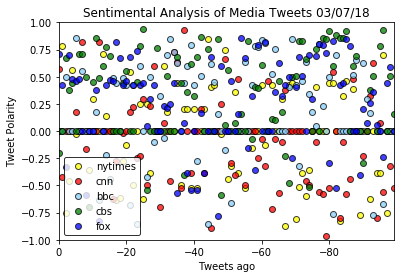

In [52]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
nytimes=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75,label ="nytimes")

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
cnn=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75,label = "cnn")


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
bbc=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
plt.scatter(tweets_ago, bbc, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=0.75,label = "bbc")


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
cbs=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
plt.scatter(tweets_ago, cbs, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75,label = "cbs")


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
plt.scatter(tweets_ago, fox, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label = "fox")

# The maximum x value for our chart will be 100
x_limit = np.min(tweets_ago)

# The y limits of our scatter plot is 0 to 1
plt.ylim(-1, 1)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit)

import time
dt = time.strftime("%m/%d/%y")
plt.title(f"Sentimental Analysis of Media Tweets {dt}")
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")
plt.legend(frameon = True,edgecolor = 'black', loc = 'best')

plt.savefig("newsmood_scatter.png")
plt.show()

In [53]:
# The second plot will be a bar plot visualizing the _overall_ sentiments 
overall_sent = []
for target_outlet in news_outlets:
    print(target_outlet)
    tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media==target_outlet]['compound']
    overall_sent.append(np.mean(tweet_compound))

nytimes
CNN
BBC
CBS
fox


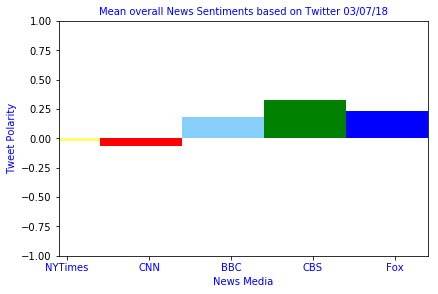

In [67]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sent[0], facecolor='yellow', alpha=0.6, align="center",width=1.0)
plt.bar(1, overall_sent[1], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sent[2], facecolor='lightskyblue', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sent[3], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sent[4], facecolor='blue', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["NYTimes","CNN","BBC", "CBS", "Fox"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(-1,+1)
plt.ylabel("Tweet Polarity", fontsize=10, color='blue')
plt.xlabel("News Media", fontsize=10, color='blue')
plt.title(f"Mean overall News Sentiments based on Twitter {dt}", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.savefig("newsmood_bar.png")
plt.show()